In [36]:
import numpy as np

# Imports nécessaires pour construire un modèle LeNet avec l'API fonctionnelle de Keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Rescaling, BatchNormalization

# Pour encoder les labels
from keras.utils import to_categorical

# Pour visualiser les performances
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# Pour évaluer les performances 
#from sklearn import metrics

# Pour importer le datasets mnist de Keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


# Chargement du dataset
img_size = (224, 224)  # Taille cible
batch_size = 128

train_ds = image_dataset_from_directory(
    "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample",
    image_size=img_size,
    batch_size=batch_size,
    subset="training",
    validation_split=0.2,
    seed=42
)

val_ds = image_dataset_from_directory(
    "/mnt/c/Users/karim/rakuten/images/data_clean/images_deep/sample",
    image_size=img_size,
    batch_size=batch_size,
    subset="validation",
    validation_split=0.2,
    seed=42
)


Found 6851 files belonging to 3 classes.
Using 5481 files for training.
Found 6851 files belonging to 3 classes.
Using 1370 files for validation.


In [39]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

# Normalisation 
normalization_layer = Rescaling(1./255)

# Première couche de convolution
conv_30 = Conv2D(
    filters=30,                    # Nombre de filtres
    kernel_size=(5, 5),            # Dimensions du noyau
    padding='valid',               # Mode de Dépassement
    activation='relu',             # Fonction d'activation
)

# Première couche de pooling
max_pool_1 = MaxPooling2D(pool_size=(2, 2),)

# Deuxième couche de convolution
conv_16 = Conv2D(
    filters=16,                    
    kernel_size=(3, 3),          
    padding='valid',             
    activation='relu',
)

# Deuxième couche de pooling
max_pool_2 = MaxPooling2D(pool_size=(2, 2),)

# Couche de dropout
dropout = Dropout(0.2)

# Couche de Flatten
flatten = Flatten()

# Première couche dense
dense_128 = Dense(
    units=128,
    activation='relu',
)

# Couche de sortie
dense_softmax = Dense(
    units=3,
    activation='softmax',
)

In [40]:
###  Architecture du model ###

inputs = Input(shape=(224, 224, 3))

# Extraction des caractéristqiues
x = normalization_layer(inputs)
x = conv_30(x)
x = max_pool_1(x)
x = conv_16(x)
x = max_pool_2(x)
x = dropout(x)

# Applatissement 
x = flatten(x)

# Couches dense pour la prédiction 
x = dense_128(x)
outputs = dense_softmax(x)

lenet = Model(inputs=inputs, outputs=outputs)

lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

lenet_history = lenet.fit(train_ds,           # données
                           validation_data=val_ds,
                           epochs=15)             # taille des batchs

Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.4209 - loss: 3.0586 - val_accuracy: 0.5759 - val_loss: 0.8845
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.6308 - loss: 0.8108 - val_accuracy: 0.6737 - val_loss: 0.7598
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.7145 - loss: 0.6915 - val_accuracy: 0.6818 - val_loss: 0.7545
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.7417 - loss: 0.6224 - val_accuracy: 0.7007 - val_loss: 0.7292
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.7817 - loss: 0.5282 - val_accuracy: 0.6912 - val_loss: 0.7522
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.8243 - loss: 0.4409 - val_accuracy: 0.6861 - val_loss: 0.8328
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.8528 - loss: 0.3803 - val_accuracy: 0.6905 - val_loss: 0.8966
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8784 - loss: 0.3053 - val_accuracy: 0.6

In [41]:
###  Architecture du model ###

inputs = Input(shape=(224, 224, 3))

# Extraction des caractéristqiues

x = data_augmentation(inputs)
x = normalization_layer(x)
x = conv_30(x)
x = max_pool_1(x)
x = conv_16(x)
x = max_pool_2(x)
x = dropout(x)

# Applatissement 
x = flatten(x)

# Couches dense pour la prédiction 
x = dense_128(x)
outputs = dense_softmax(x)

lenet_augmente = Model(inputs=inputs, outputs=outputs)

lenet_augmente.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

lenet_augmente_history = lenet_augmente.fit(train_ds,           # données
                           validation_data=val_ds,
                           epochs=15)             # taille des batchs

Epoch 1/15


E0000 00:00:1741948403.403112    1718 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_15_1/dropout_8_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.5330 - loss: 1.3754 - val_accuracy: 0.6453 - val_loss: 0.8085
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.6249 - loss: 0.8410 - val_accuracy: 0.6540 - val_loss: 0.7779
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.6584 - loss: 0.7832 - val_accuracy: 0.6766 - val_loss: 0.7310
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.6702 - loss: 0.7541 - val_accuracy: 0.6591 - val_loss: 0.7625
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.6822 - loss: 0.7401 - val_accuracy: 0.6599 - val_loss: 0.7343
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.6753 - loss: 0.7324 - val_accuracy: 0.6737 - val_loss: 0.7183
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.6990 - loss: 0.7029 - val_accuracy: 0.6920 - val_loss: 0.7187
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7023 - loss: 0.6960 - val_accuracy: 0.6942 - val_lo

In [42]:
###  Architecture du model ###

inputs = Input(shape=(224, 224, 3))

# Extraction des caractéristqiues

x = data_augmentation(inputs)
x = normalization_layer(x)
x = conv_30(x)
x = BatchNormalization()(x)
x = max_pool_1(x)
x = conv_16(x)
x = BatchNormalization()(x)
x = max_pool_2(x)
x = dropout(x)

# Applatissement 
x = flatten(x)

# Couches dense pour la prédiction 
x = dense_128(x)
outputs = dense_softmax(x)

lenet_BatchNormalization = Model(inputs=inputs, outputs=outputs)

lenet_BatchNormalization.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

lenet_BatchNormalization_history = lenet_BatchNormalization.fit(train_ds,           # données
                           validation_data=val_ds,
                           epochs=15)             # taille des batchs

Epoch 1/15


E0000 00:00:1741948499.640562    1718 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_16_1/dropout_8_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.6302 - loss: 9.7119 - val_accuracy: 0.4642 - val_loss: 6.3064
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 259ms/step - accuracy: 0.5226 - loss: 1.3494 - val_accuracy: 0.3642 - val_loss: 15.8400
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.5859 - loss: 1.0470 - val_accuracy: 0.2606 - val_loss: 25.8262
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.5876 - loss: 0.8949 - val_accuracy: 0.2942 - val_loss: 24.9897
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.6086 - loss: 0.8108 - val_accuracy: 0.2898 - val_loss: 33.2636
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 259ms/step - accuracy: 0.6192 - loss: 0.8293 - val_accuracy: 0.2839 - val_loss: 35.7758
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.6285 - loss: 0.7681 - val_accuracy: 0.3788 - val_loss: 25.2995
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.6504 - loss: 0.7367 - val_accuracy: 0

In [44]:
###  Architecture du model ###

inputs = Input(shape=(224, 224, 3))

# Extraction des caractéristqiues

x = data_augmentation(inputs)
x = normalization_layer(x)
x = conv_30(x)
x = BatchNormalization()(x)
x = max_pool_1(x)
x = dropout(x)
x = conv_16(x)
x = BatchNormalization()(x)
x = max_pool_2(x)
x = dropout(x)

# Applatissement 
x = flatten(x)

# Couches dense pour la prédiction 
x = dense_128(x)
outputs = dense_softmax(x)

lenet_dropout = Model(inputs=inputs, outputs=outputs)

lenet_dropout.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

lenet_dropout_history = lenet_dropout.fit(train_ds,           # données
                           validation_data=val_ds,
                           epochs=15)             # taille des batchs

Epoch 1/15


E0000 00:00:1741949287.429420    1718 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_17_1/dropout_8_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 271ms/step - accuracy: 0.6727 - loss: 0.7670 - val_accuracy: 0.2518 - val_loss: 15.1135
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.6894 - loss: 0.7121 - val_accuracy: 0.2343 - val_loss: 28.9295
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 269ms/step - accuracy: 0.7064 - loss: 0.6926 - val_accuracy: 0.2358 - val_loss: 48.2975
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 269ms/step - accuracy: 0.6971 - loss: 0.6845 - val_accuracy: 0.2350 - val_loss: 49.9979
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.7144 - loss: 0.6706 - val_accuracy: 0.2307 - val_loss: 47.2390
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 269ms/step - accuracy: 0.7217 - loss: 0.6575 - val_accuracy: 0.2701 - val_loss: 35.7398
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 269ms/step - accuracy: 0.7210 - loss: 0.6547 - val_accuracy: 0.3496 - val_loss: 33.7442
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - accuracy: 0.7246 - loss: 0.6470 - val_accuracy: 0

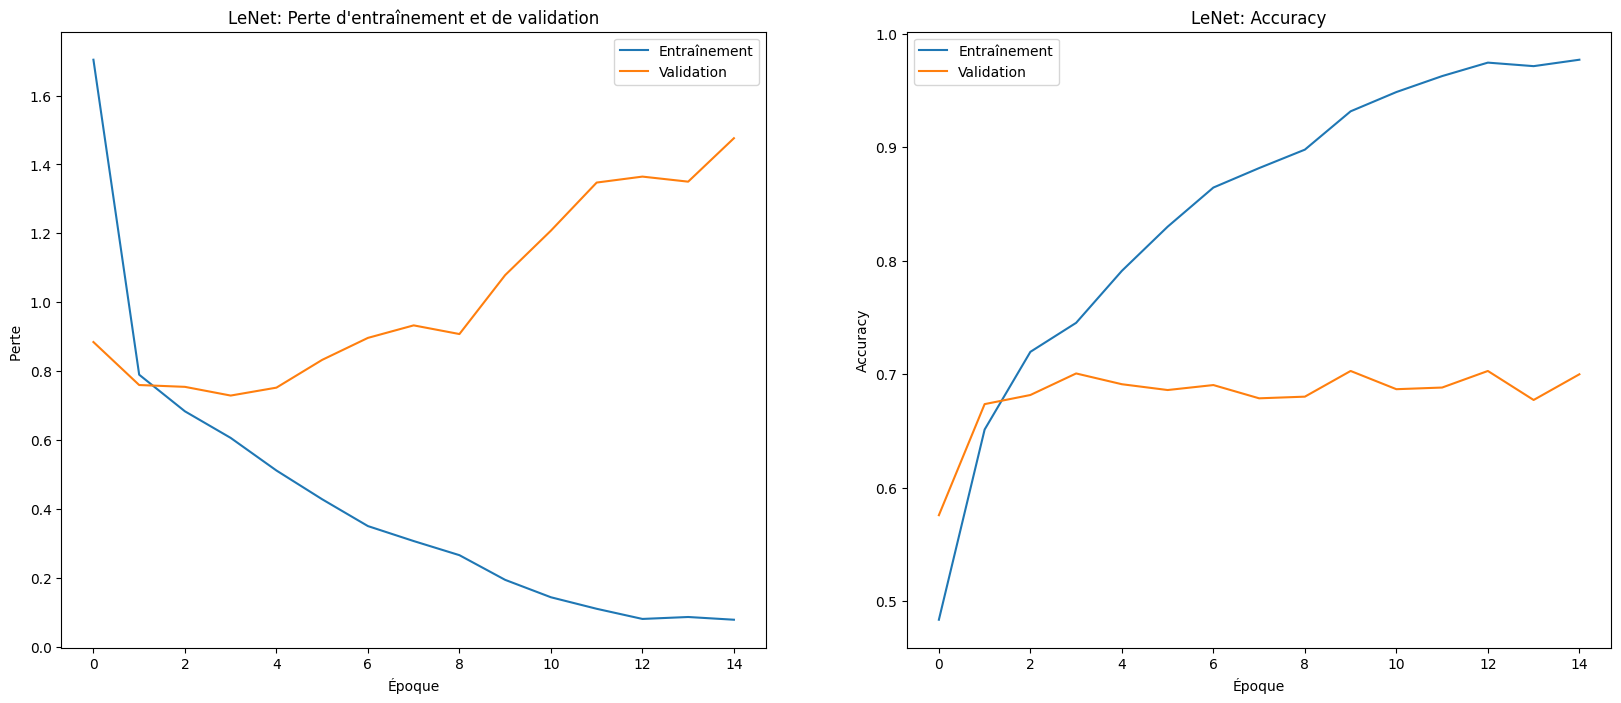

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6587 - loss: 0.9871 
Précision de validation finale: 0.6474


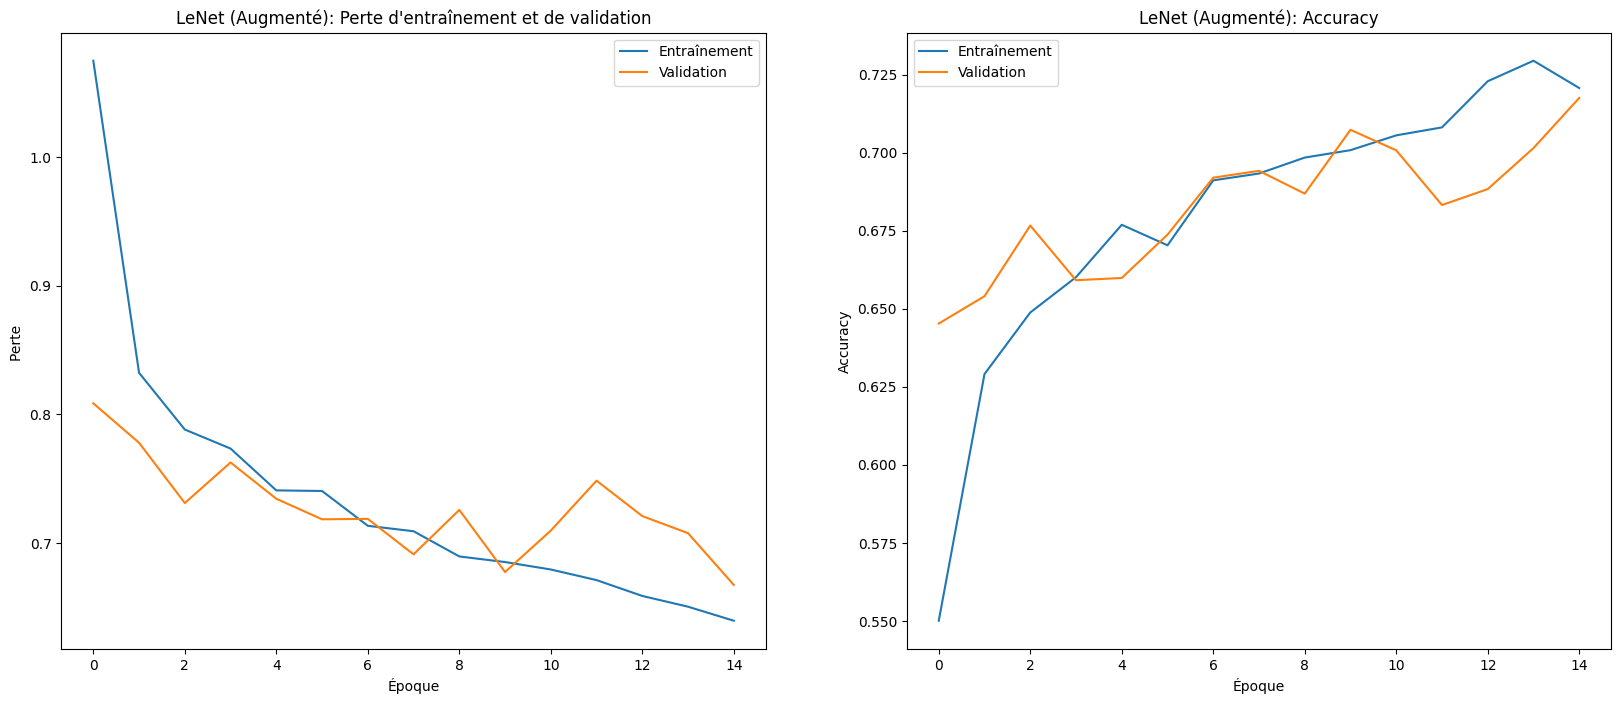

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6511 - loss: 0.9861 
Précision de validation finale: 0.6474


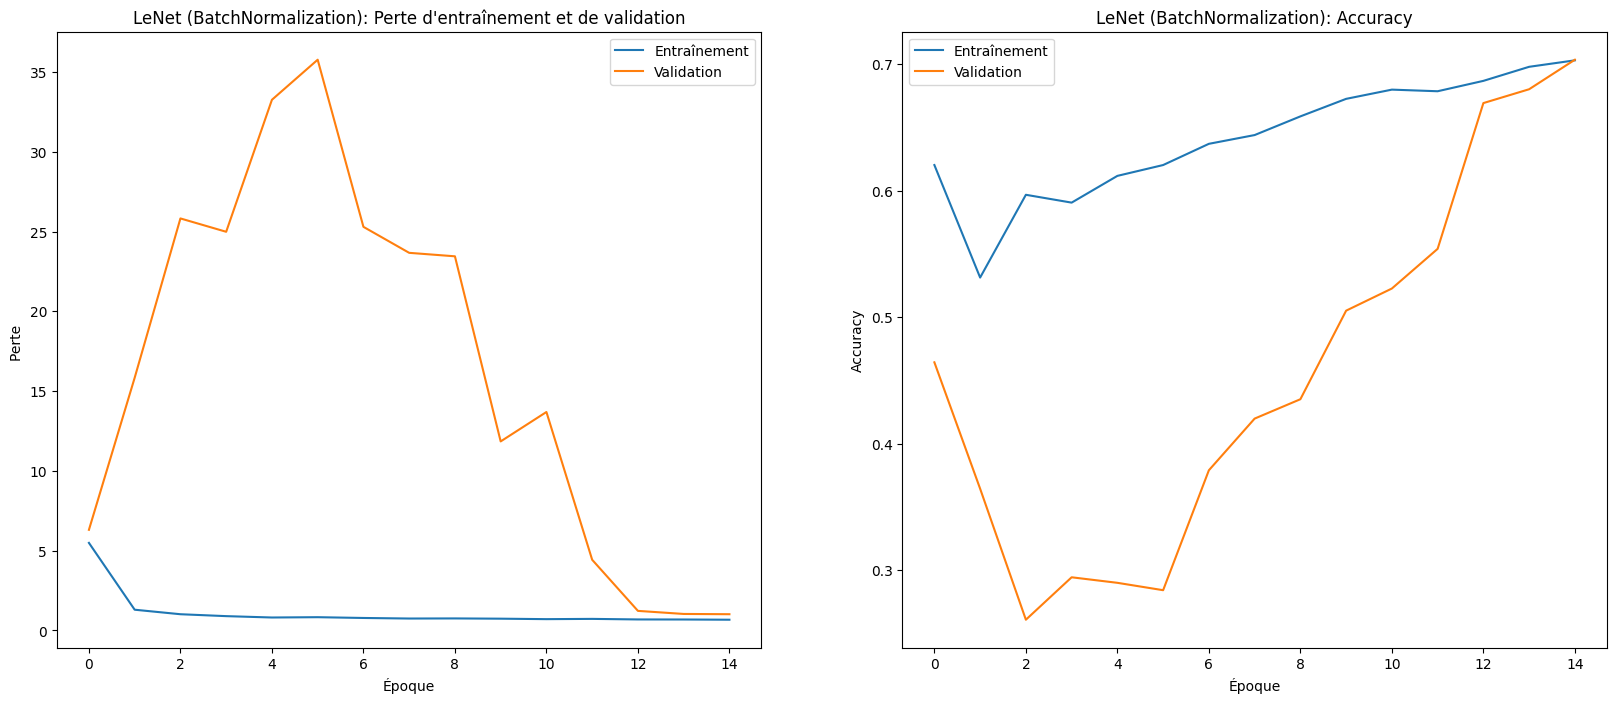

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6421 - loss: 0.9928 
Précision de validation finale: 0.6474


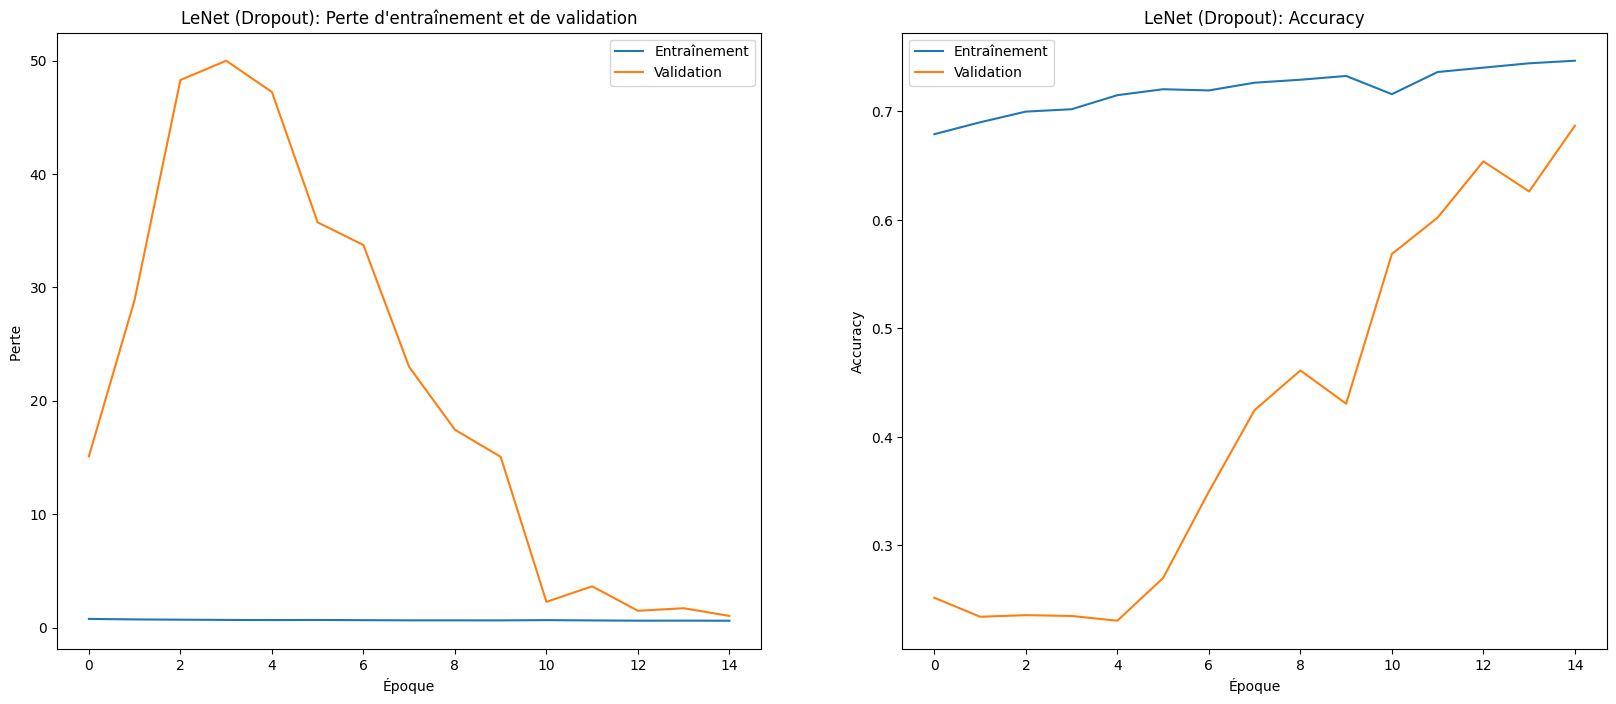

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6456 - loss: 0.9857 
Précision de validation finale: 0.6474


In [45]:
def display_results(model_history, model_name):
    # Récupérer les données d'entraînement et de validation
    train_loss = model_history.history["loss"]
    val_loss = model_history.history["val_loss"]
    train_accuracy =  model_history.history["accuracy"]
    val_accuracy = model_history.history["val_accuracy"]
    
    plt.figure(figsize=(20, 8))
    
    # Tracer la perte
    plt.subplot(121)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title(model_name + ": Perte d'entraînement et de validation")
    plt.ylabel('Perte ')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    # Tracer l'erreur absolue moyenne (MAE)
    plt.subplot(122)
    plt.plot(train_accuracy)
    plt.plot(val_accuracy)
    plt.title(model_name+': Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Époque')
    plt.legend(['Entraînement', 'Validation'], loc='best')
    
    plt.show()
    
    # Évaluation finale sur l'ensemble de validation
    val_loss, val_accuracy = lenet.evaluate(val_ds)
    print(f"Précision de validation finale: {val_accuracy:.4f}")

display_results(lenet_history, "LeNet")
display_results(lenet_augmente_history, "LeNet (Augmenté)") 
display_results(lenet_BatchNormalization_history, "LeNet (BatchNormalization)") 
display_results(lenet_dropout_history, "LeNet (Dropout)") 